In [1]:
using Plots, PlotThemes
theme(:solarized)

ErrorException: Unknown key: colorgradient

In [10]:
function ret2cort(r_R, θ_R)
x, y = log.(1 .+ r_R) , ( r_R .* θ_R ) ./ ( 1 .+ r_R )
end

function cor_ret(x, y)
    if x==0
        return [0,0]
    end
    r_R = exp(x)-1 
    θ_R = y * ( (1 /r_R) + 1)
    return [r_R, θ_R]
end
function cort2ret(x, y)
    res = cor_ret.(x,y)
    r_R = [ res[i][1] for i in 1:length(res) ]
    θ_R = [ res[i][2] for i in 1:length(res) ]
    r_R, θ_R
end
function coords2gray(x,y) #x must be int and can contain negatives
    M = zeros(maximum(y)-minimum(y)+1, maximum(x)-minimum(x)+1)
#     print(size(x),size(y))
    for i in 1:size(x,1)
        M[y[i]-minimum(y)+1, x[i]-minimum(x)+1] = 1
    end
    Gray.(M)
end
function arr2int(arr, N)
    x_max = maximum(abs.(arr))
    arr_int = map( x-> (x*N /x_max)÷1 , arr)
    convert(Array{Int64,1}, arr_int)
end

arr2int (generic function with 1 method)

# Test

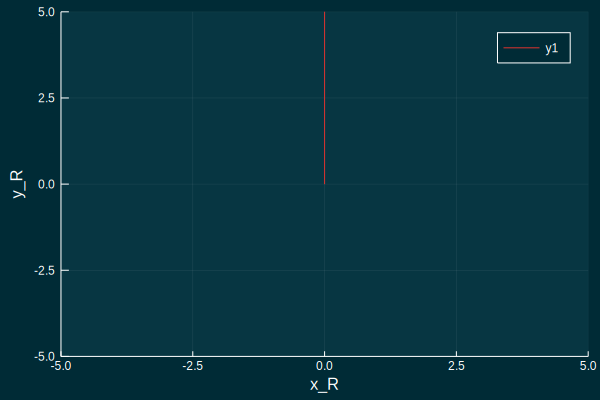

In [11]:
r_R = range(0, length=100, stop=50)
θ_R = ones(100) .* (π/2) 
plot(xaxis = ("x_R", (-5,5)), yaxis = ("y_R", (-5,5)))
plot!(r_R.*cos.(θ_R), r_R.*sin.(θ_R))

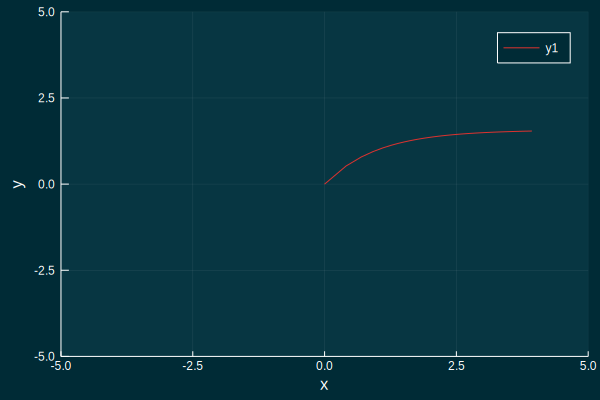

In [12]:
x, y = ret2cort(r_R, θ_R)
plot(xaxis = ("x", (-5,5)), yaxis = ("y", (-5,5)))
plot!(x,y)

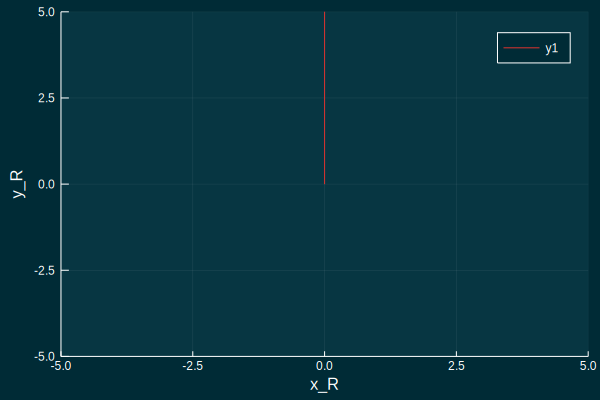

In [15]:
r_R, θ_R = cort2ret(x,y)
plot(xaxis = ("x_R", (-5,5)), yaxis = ("y_R", (-5,5)))
plot!(r_R.*cos.(θ_R), r_R.*sin.(θ_R))

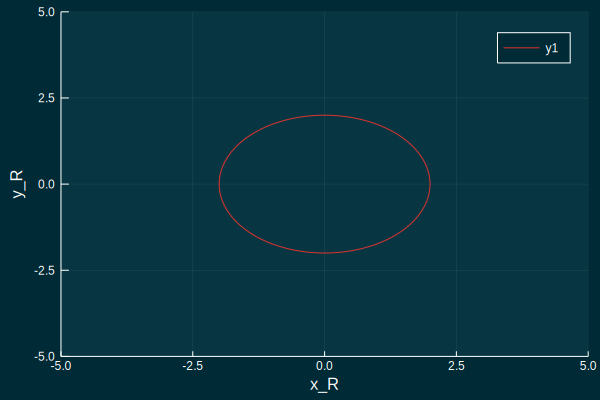

In [16]:
r_R = ones(100).*2
θ_R = range(0, length=100, stop=2*π)
plot(xaxis = ("x_R", (-5,5)), yaxis = ("y_R", (-5,5)))
plot!(r_R.*cos.(θ_R), r_R.*sin.(θ_R))

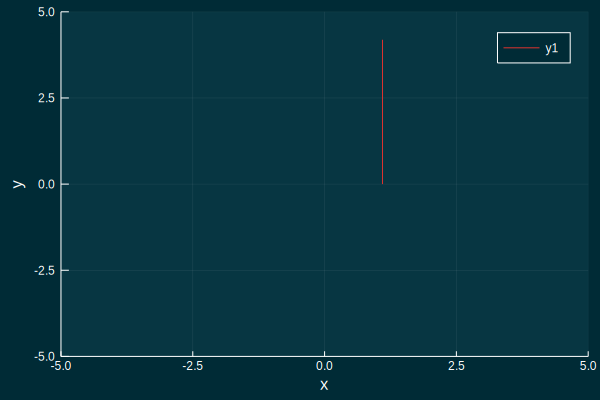

In [17]:
x, y = ret2cort(r_R, θ_R)
plot(xaxis = ("x", (-5,5)), yaxis = ("y", (-5,5)))
plot!(x,y)

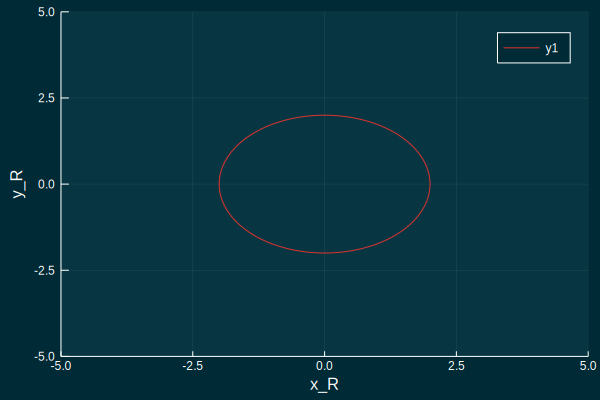

In [18]:
r_R, θ_R = cort2ret(x,y)
plot(xaxis = ("x_R", (-5,5)), yaxis = ("y_R", (-5,5)))
plot!(r_R.*cos.(θ_R), r_R.*sin.(θ_R))

# Image

In [19]:
using Images

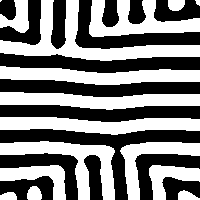

In [20]:
img = load("I_res.png")
mat = convert(Array{Float64}, img);
idxs = findall(x->x==1, mat);
img

(1, 200)(1, 200)

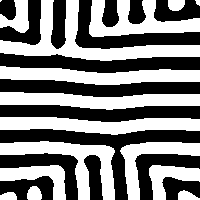

In [46]:
x = [ i[2] for i in idxs ];
y = [ i[1] for i in idxs ];
print(extrema(x),extrema(y))
coords2gray(x,y)

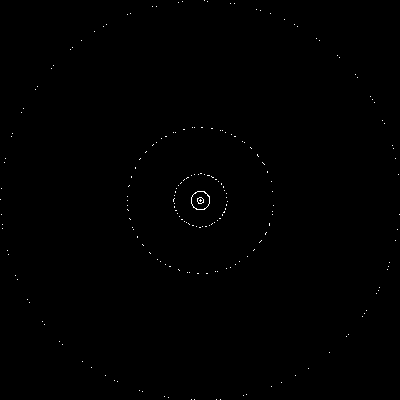

In [47]:
r_R, θ_R = cort2ret(x,y)
x_R, y_R = r_R.*cos.(θ_R), r_R.*sin.(θ_R);
x_R = x_R/maximum(abs.(x_R))
y_R = y_R/maximum(abs.(y_R));
N = 200
x_R_int = arr2int(x_R,N)
y_R_int = arr2int(y_R,N)
coords2gray(x_R_int, y_R_int)

(0.005, 1.0)(0.005, 1.0)

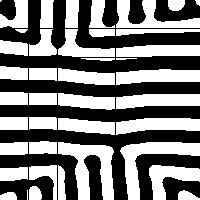

In [48]:
x = [ i[2] for i in idxs ]/200;
y = [ i[1] for i in idxs ]/200;
print(extrema(x),extrema(y))
coords2gray(arr2int(x,200),arr2int(y,200))

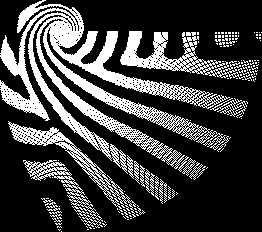

In [49]:
r_R, θ_R = cort2ret(x,y)
x_R, y_R = r_R.*cos.(θ_R), r_R.*sin.(θ_R);
x_R = x_R/maximum(abs.(x_R))
y_R = y_R/maximum(abs.(y_R));
N = 200
x_R_int = arr2int(x_R,N)
y_R_int = arr2int(y_R,N)
coords2gray(x_R_int, y_R_int)

In [50]:
x = [ i[2]-100 for i in idxs ];
y = [ i[1]-100 for i in idxs ];
print(extrema(x),extrema(y))

(-99, 100)(-99, 100)

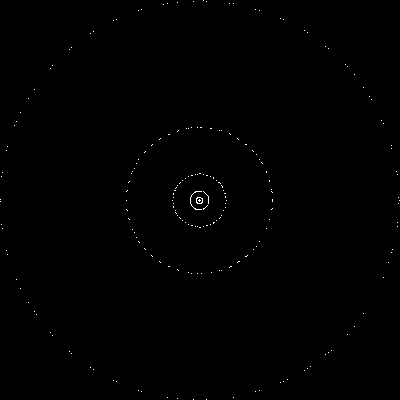

In [51]:
r_R, θ_R = cort2ret(x,y)
x_R, y_R = r_R.*cos.(θ_R), r_R.*sin.(θ_R);
x_R = x_R/maximum(abs.(x_R))
y_R = y_R/maximum(abs.(y_R));
N = 200
x_R_int = arr2int(x_R,N)
y_R_int = arr2int(y_R,N)
coords2gray(x_R_int, y_R_int)

In [52]:
x = [ i[2]-100 for i in idxs ]/100;
y = [ i[1]-100 for i in idxs ]/100;
print(extrema(x),extrema(y))

(-0.99, 1.0)(-0.99, 1.0)

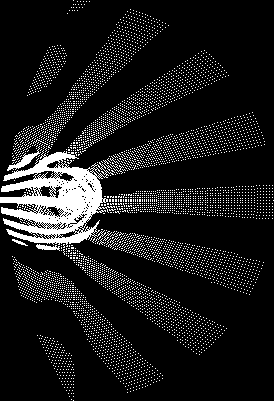

In [53]:
r_R, θ_R = cort2ret(x,y)
x_R, y_R = r_R.*cos.(θ_R), r_R.*sin.(θ_R);
x_R = x_R/maximum(abs.(x_R))
y_R = y_R/maximum(abs.(y_R));
N = 200
x_R_int = arr2int(x_R,N)
y_R_int = arr2int(y_R,N)
coords2gray(x_R_int, y_R_int)